# protospacer flanking sequences data exploration

In [1]:
# 05/07
# Made by L-F-S
# At the University Of Trento, Italy

import os

import sys
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
# for clustal alignments
#from Bio import AlignIO
#from Bio.Align.Applications import ClustalwCommandline
#from Bio.Align import AlignInfo
# to make logos
import logomaker as lm

feature="Cas9" #WARNING!!! CHANGE THIS!!
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/8pamsearch/out/"
seqid ="LPEAHEHG_01071"   # MANUAL INPUT
outdir=datadir+seqid+"/"


### Load file

In [2]:
PAM_dataset_name="dataset_flanking_sequences_of_putative_protospacers"
PAMdata=pd.read_csv(outdir+PAM_dataset_name, header=None)
PAMdata.head()

,0,1,2,3,4,5
0,NODE_2665_length_6227_cov_8.10904,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCACATGTT...,AsnicarF_2017__MV_FEM4_t2Q15.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
1,NODE_2926_length_6330_cov_16.3025_ID_8983,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCACATGTT...,AsnicarF_2017__MV_FEM4_t2Q15_megahit.contigs_f...,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
2,NODE_14221_length_1859_cov_11.0516,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCC,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
3,NODE_1835_length_8657_cov_5.01686,AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...,CGAGGTAAAAGAAGAACGGCAGAAAATCGTTTTGAAGTCCAATGTT...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTTCTGTGCCATTTCCTCTATGACAGAATC
4,NODE_348_length_26720_cov_4.00548,GCTGCCGGGCTGGCCGCCCAGCCACCCGCAGCAGTTTTCGTTGGAT...,TTCCGTACCACCGGGCAGCTGGTAATAGGGGTTGCGGGTTGCGCTC...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,CTGCCCGGCGACGTGCGTGTGAGTGATACG


col0: contig, col1: upstream flanking sequence, col1: downtream flanking sequence, col3: samplename col4: bin (0 if unbinned)  col5: protospacer

In [3]:
PAMdata.shape

(2423, 6)

## Check length of flanking regions

count    2423.0
mean       51.0
std         0.0
min        51.0
25%        51.0
50%        51.0
75%        51.0
max        51.0
Name: 1, dtype: float64


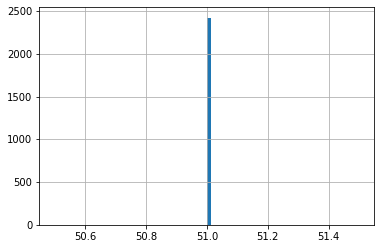

In [4]:
upstream_length=PAMdata[1].str.count("")
upstream_length.hist(bins=80)
print(upstream_length.describe())

In [5]:
print(PAMdata[1].shape,PAMdata[1].dropna().shape)

(2423,) (2423,)


### count how many upstream are different from 51


In [9]:
PAMdata[1].str.count("").value_counts()

51    2423
Name: 1, dtype: int64

they are all either 51 or none.

## Downstream

count    2392.000000
mean       50.157191
std         5.142751
min         2.000000
25%        51.000000
50%        51.000000
75%        51.000000
max        51.000000
Name: 2, dtype: float64


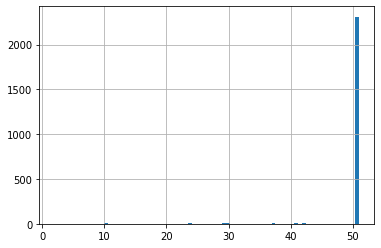

In [10]:
down_length=PAMdata[2].str.count("")
down_length.hist(bins=80)
print(down_length.describe())

In [11]:
#count how many downstream ar different from 51
PAMdata[2].str.count("").value_counts()

51.0    2311
24.0      11
10.0       7
37.0       6
30.0       5
42.0       4
29.0       4
41.0       4
18.0       3
2.0        3
22.0       3
16.0       3
36.0       3
44.0       3
50.0       3
4.0        3
12.0       2
13.0       2
38.0       2
26.0       1
17.0       1
6.0        1
9.0        1
3.0        1
33.0       1
32.0       1
46.0       1
40.0       1
47.0       1
Name: 2, dtype: int64

lots of shorter sequences, for protospacers close to the end of the contig.

How do you explain empty upstreams?
SOLVED: because of python indexing: example

In [56]:
astring=list(range(100))
start=0
end=9
a_downstream_substring_outisde=astring[90:150]
print(a_downstream_substring_outisde,": this prints out but is shorter")
an_upstream_substring_outisde=astring[-10:20], "this does not save")
print(an_upstream_substring_outisde)



[90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[]


### extract sample names of the upstream mess :, and re run them
actually, some downstream messed up the same. must fis this and re run on faulty ones

In [100]:
#voglio 6 nt a valle (downstream) di protospacer AAAAAAAAAX: ne ho solo 5 (BBBBB)
l="AAAAAAAAAXBBBBZ"
end=10 # output da blast
#lo voglio lungo 50
print("my protospacer", l[:end])
print("last letter of protospacer", l[end-1])
last_pos=len(l)
print("last_pos",l[last_pos])
print("qll che faccio brutale è ", l[end:last_pos])
print("qll che prendo fino alla fine è ", l[end:last_pos])
print("qll che fingerà sarà ",l[end:last_pos]+"X"*(20-last_pos))

my protospacer AAAAAAAAAX
last letter of protospacer X


IndexError: string index out of range

In [ ]:
#ATTENZIONE ALLE UPSTREAM, vano allineate correttamente!!!!

In [12]:
#only downstream NAs:
PAMdata[PAMdata[2].isnull()].head(30)

,0,1,2,3,4,5
27,NODE_107_length_82686_cov_33.7972_ID_43121,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BackhedF_2015__SID179_M_megahit.contigs_filter...,0,TTCTGTGCCATTTCCTCTATGACAGAATC
28,NODE_161_length_65790_cov_31.9339_ID_43122,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BackhedF_2015__SID179_M_megahit.contigs_filter...,0,TTCTGTGCCATTTCCTCTATGACAGAATC
113,NODE_416_length_82143_cov_17.9917_ID_217247,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES36_megahit.cont...,0,GCCATTTCCTCTATGACAGAATC
115,NODE_23_length_255449_cov_19.9970_ID_217248,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES36_megahit.cont...,0,GCCATTTCCTCTATGACAGAATC
120,NODE_3130_length_14532_cov_30.9167_ID_29179,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES3_megahit.conti...,0,GCCATTTCCTCTATGACAGAATC
133,NODE_4420_length_14532_cov_61.8307_ID_39531,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES4_megahit.conti...,0,GCCATTTCCTCTATGACAGAATC
146,NODE_382_length_58139_cov_49.9662_ID_118957,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES57_megahit.cont...,0,GCCATTTCCTCTATGACAGAATC
150,NODE_521_length_58139_cov_47.9676_ID_120373,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,BengtssonPalmeJ_2015__TRAVELRES58_megahit.cont...,0,GCCATTTCCTCTATGACAGAATC
678,NODE_859_length_23796_cov_22.0669_ID_13182,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,HMP_2012__SRS017103_megahit.contigs_filtered.f...,0,GCCATTTCCTCTATGACAGAATC
679,NODE_360_length_37649_cov_21.9888_ID_46965,ATGAAACACAGGACTTCAAAACGATTTTCTGCCGTTCTTCTTTTAC...,NaN,HMP_2012__SRS017103_megahit.contigs_filtered.f...,0,GCCATTTCCTCTATGACAGAATC


In [13]:


PAMdata[PAMdata[2].isnull()].shape

(31, 6)

All NaN downstream seem to be (after checking) of protospacers who end exactly at the last position, we will therefore remove all the downstream Nans from downstream computations

In [108]:
# the same for upstream nans:
PAMdata[PAMdata[1].isnull()].shape

(102, 6)

In [111]:
PAMdata[PAMdata[1].isnull()].head(20)

,0,1,2,3,4,5
18,NODE_16046_length_1718_cov_1.75827,NaN,TCGCCCACGTTCCAAATTTGCGAGGCAAAGTGCGCGGCCCGCCATG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GTGCCGATAAACTGCCCCTTGGAAATGGTG
172,NODE_25600_length_2395_cov_2.39402,NaN,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,BengtssonPalmeJ_2015__TRAVELRES10.contigs_filt...,0,TACATCGACATGAACAGCATACCGATGCTG
185,NODE_26470_length_1714_cov_7.0000_ID_138340,NaN,CCGATCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,BengtssonPalmeJ_2015__TRAVELRES20_megahit.cont...,0,TACATCGACATGAACAGCATACCGATGCTG
256,NODE_32371_length_2015_cov_9.0000_ID_210924,NaN,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACACTGG...,BengtssonPalmeJ_2015__TRAVELRES4_megahit.conti...,0,ACATCGACATGAACAGCATACCGACGCTG
293,NODE_55124_length_1192_cov_2.38522,NaN,CCGAGCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,BengtssonPalmeJ_2015__TRAVELRES9.contigs_filte...,0,TACATCGACATGAACAGCATACCGATGCTG
298,NODE_4044_length_5273_cov_45.0000_ID_126029,NaN,CCGATCATTGCGACGTAGAAGATGATCTCCAGCCAAGGAATGCTCG...,BritoIL_2016__M1.23.ST_megahit.contigs_filtere...,0,TACATCGACATGAACAGCATACCGATGCTG
353,NODE_12196_length_2776_cov_6.0000_ID_96776,NaN,CTGTCCACCACAACGGTATTAGCTTCGTACTGGCTGGTGATGTCCC...,BritoIL_2016__W1.6.ST_megahit.contigs_filtered...,0,GGCTGCACGGAAAGATAGGCGTTGCCGTTG
396,NODE_21608_length_1773_cov_39.0000_ID_214994,NaN,CCCAGCATGACCGAGTAGAAGATGATCTCCAACCAGGGCACGCTGG...,BritoIL_2016__WL.8.ST_megahit.contigs_filtered...,0,TACATCGACATGAACAGCATACCGACGCTG
449,NODE_3348_length_8230_cov_7.60416,NaN,CCAATCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,CM_madagascar__A09_02_1FE.contigs_filtered.fasta,0,TACATCGACATGAACAGCATACCGATGCTG
509,NODE_4117_length_3592_ID_71743,NaN,CCGCGGCGGTGCGGGCGGCGGCATCATGAATGTCGGCCGTGCCAAG...,CM_madagascar__A39_01_1FE_megahit.contigs_filt...,0,TACATCGACATGAACAGCATACCGACGCTG


In [14]:
all_samples=PAMdata[3]
print(PAMdata.shape)
newdata=PAMdata[PAMdata.isnull().any(1)]
print(newdata.shape)
bad_samples=newdata[3]
print(bad_samples)
bad_samples.to_csv(datadir+"samples_to_rerun.csv", index=None)


(2423, 6)
(31, 6)
27      BackhedF_2015__SID179_M_megahit.contigs_filter...
28      BackhedF_2015__SID179_M_megahit.contigs_filter...
113     BengtssonPalmeJ_2015__TRAVELRES36_megahit.cont...
115     BengtssonPalmeJ_2015__TRAVELRES36_megahit.cont...
120     BengtssonPalmeJ_2015__TRAVELRES3_megahit.conti...
133     BengtssonPalmeJ_2015__TRAVELRES4_megahit.conti...
146     BengtssonPalmeJ_2015__TRAVELRES57_megahit.cont...
150     BengtssonPalmeJ_2015__TRAVELRES58_megahit.cont...
678     HMP_2012__SRS017103_megahit.contigs_filtered.f...
679     HMP_2012__SRS017103_megahit.contigs_filtered.f...
724     HMP_2012__SRS063985_megahit.contigs_filtered.f...
878     KarlssonFH_2013__S536_megahit.contigs_filtered...
925      LeChatelierE_2013__MH0118.contigs_filtered.fasta
1353    NielsenHB_2014__MH0173_megahit.contigs_filtere...
1403     NielsenHB_2014__V1_CD29_0.contigs_filtered.fasta
1469     QinJ_2012__NLM032_megahit.contigs_filtered.fasta
1470     QinJ_2012__NLM032_megahit.contigs_filtered.fa

/home/lorenzo.signorini/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


In [ ]:
# da fare: se sono downstream:
aggiungi una cosa che riempie le downstream con il valore piu comune (non voglio dropparle xke perderei gli upstream)
#se sn up corti:
sostituisci le x con le cose piu comuni per i downstrea,

## temporaneamente:

In [15]:
#
#per ora let us drop those lines
PAMdata=PAMdata.dropna()
PAMdata.shape

(2392, 6)

# Sequence logos

In [ ]:
#versione dataset:


In [ ]:
# This must take as input a dictionary of tuples
# with flanking regions for all porotspacers. How do we enlarge the dictionary now? 
# Maybe instead of a dictionary we write a little file: 
# col0: contigname (of target contig with protospacer) 
# col1: upstream seq, col2: downstream sequence col3: samplename (old, epasolli), 
# col4: bin name if binned (old, epasolli), otherwise 0 (NOT USED IN CODE BELOW YET) 
#  col5: PROTOSPACER sequence
# so all this code below in this box will probly be obsolete

all_flanking_sequences=open(outdir+all_flanking_file,"r")
upstream_seqs, downstream_seqs, upstream_seqs_rvc, downstream_seqs_rvc, = [],[],[],[]
for line in all_flanking_sequences.readlines():
  #  target_contig=line.strip("\n").split(",")[0]
    up_in_cont=line.strip("\n").split(",")[1]
    down_in_cont=line.strip("\n").split(",")[2]
   # cont_sample=line.strip("\n").split(",")[3]
    upstream_seqs.append(up_in_cont)
    upstream_seqs_rvc.append(str(Seq(up_in_cont).reverse_complement()))
    downstream_seqs.append(down_in_cont)
    downstream_seqs_rvc.append(str(Seq(down_in_cont).reverse_complement()))
f.close()

In [16]:
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata[1])
counts_mat.to_csv(outdir+"upstream.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,1221.0,252.0,648.0,169.0,102.0
1,123.0,423.0,342.0,1403.0,101.0
2,639.0,97.0,728.0,827.0,101.0
3,812.0,416.0,295.0,770.0,99.0
4,691.0,414.0,530.0,658.0,99.0


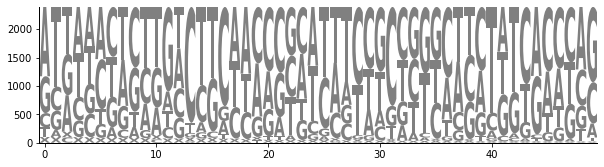

In [17]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#plt.savefig(seqid+"upstream.logo1.pdf")

In [18]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.to_csv(outdir+"downv1.pileup")
counts_mat.head()

,A,C,G,T
pos,,,,
0,84.0,1254.0,678.0,295.0
1,167.0,409.0,674.0,1061.0
2,739.0,581.0,923.0,68.0
3,398.0,197.0,1146.0,570.0
4,327.0,208.0,1122.0,654.0


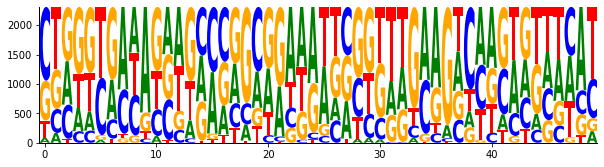

In [19]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
#plt.savefig(seqid+"downstream.logo1.pdf")

###  try filtering out binned ones..

In [20]:
PAMdata_unbinned=PAMdata[PAMdata[4]=="0"]
print(PAMdata_unbinned.head)
print(PAMdata_unbinned.shape)

<bound method NDFrame.head of                                                 0  \
0               NODE_2665_length_6227_cov_8.10904   
1       NODE_2926_length_6330_cov_16.3025_ID_8983   
2              NODE_14221_length_1859_cov_11.0516   
3               NODE_1835_length_8657_cov_5.01686   
4               NODE_348_length_26720_cov_4.00548   
...                                           ...   
2418   NODE_11750_length_2269_cov_6.0000_ID_36938   
2419            NODE_264_length_67270_cov_38.4715   
2420   NODE_694_length_35245_cov_85.9516_ID_82274   
2421           NODE_32357_length_1207_cov_8.92188   
2422  NODE_1534_length_20218_cov_14.0000_ID_93889   

                                                      1  \
0     AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...   
1     AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...   
2     AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...   
3     AGAATTTTCTTGTCTTCTTCCGTCACATTCTCTCGGAACATATCGA...   
4     GCTGCCGGGCTGGCCGCCCAGCCACCCGCAGC

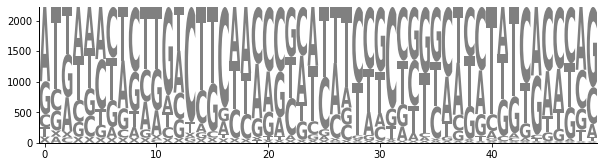

In [21]:
#redo the same stuff
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
counts_mat.to_csv(outdir+"upstream1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

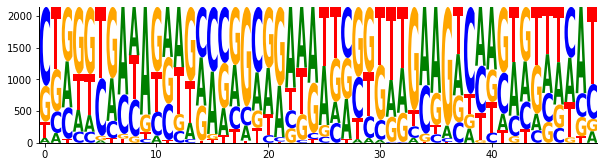

In [22]:
#downstream:
# 1: remove strings with different length:
downstream=PAMdata_unbinned[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.to_csv(outdir+"downv1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

## Inspect ciò che è diverso da quello ceh mi aspetterei. Sono (ad es) tutti di HMP_2012?

In [25]:
Only_downstream_PAM=PAMdata[PAMdata[2].str.startswith("")] # MANUAL INPUT

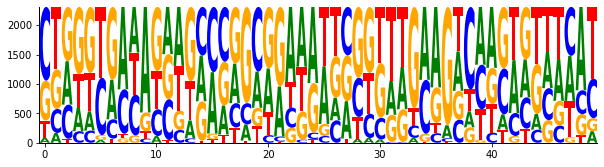

In [26]:
#downstream:
# 1: remove strings with different length:
downstream=Only_downstream_PAM[2]
downstream_only_length=downstream[downstream.str.count("")==51]
counts_mat = lm.alignment_to_matrix(downstream_only_length)
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

In [155]:
# much more polished.. let's see the upstream just for fun:

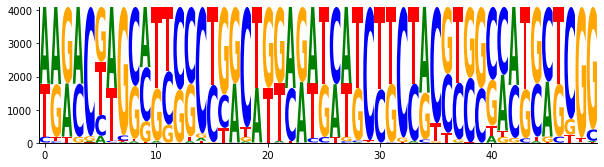

In [156]:
#Upstream:
counts_mat = lm.alignment_to_matrix(Only_downstream_PAM[1])
counts_mat.to_csv(outdir+"upstream1.pileup")
counts_mat.head()
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5)
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

In [157]:
# much more polished as wwell..too much. it's the reverse complement. What is going on here..

In [152]:
Not_with_downstream_PAM

,0,1,2,3,4,5
3,NODE_11024_length_2243_cov_3.21801,AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAGCATGCCGATGCTG
4,NODE_2410_length_7098_cov_3.4119,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTAGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAACATACCGATGCTG
6,NODE_5910_length_3325_cov_6.8221_ID_120246,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTAGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14_megahit.contigs_f...,0,TACATCGACATGAACAACATACCGATGCTG
7,NODE_5649_length_3444_cov_6.7016_ID_139043,AAGACAAGCATTCCCTGGCTGGAAATCATCTTCTATGTCGCTATGA...,CCGCGGCGGCGCAGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,AsnicarF_2017__MV_FEM5_t1Q14_megahit.contigs_f...,0,TACATCGACATGAACAGCATGCCGATGCTG
8,NODE_303_length_31921_cov_6.68377,CCTGGGCCACAGCACTGAAAGATGTCCCCTTGCAAGCGGCCAAGAG...,CCGCCCACCGTTGCCGAACTGCGCACGGCGGCAGAGAAATTTCTCC...,AsnicarF_2017__MV_FEM5_t2Q14.contigs_filtered....,0,GCGGCAAATCTGGCCGCCACACTGAAATTC
...,...,...,...,...,...,...
7402,NODE_28911_length_1635_cov_7.33101,TGACCTTGGCGCGGCCGACATTCATGATGCCGCCGCCTGCACCGCC...,CCGATCATCGCCACATAGAAGATGATCTCCAGCCAGGGCACGCTGG...,ZellerG_2014__MMPU84450604ST.contigs_filtered....,0,TACATCGACATGAACAGCATACCAATGCTG
7403,NODE_93_length_49890_cov_78.3073_ID_65529,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,ZellerG_2014__MMPU84450604ST_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCGATGCTG
7404,NODE_27203_length_1784_cov_23.0000_ID_99822,AAGACCAGCGTGCCCTGGCTGGAGATCATCTTCTATGTGGCGATGA...,CCGCGGCGGTGCAGGCGGCGGCATCATGAATGTCGGCCGCGCCAAG...,ZellerG_2014__MMPU84450604ST_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCAATGCTG
7405,NODE_13899_length_2470_cov_8.83354,AAGACGAGCATTCCCTGGCTGGAGATCATCTTCTACGTCGCAATGA...,CCGCGGCGGCGCGGGCGGCGGCATCATGAATGTGGGCCGCGCCAAG...,ZellerG_2014__MMPU99077057ST.contigs_filtered....,ZellerG_2014__MMPU99077057ST__bin.26,TACATCGACATGAACAGCATACCGATGCTG
